In [ ]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import accuracy_score , confusion_matrix

from sklearn.model_selection import train_test_split

Downloading the dataset (Iris)

In [25]:
data = datasets.load_iris()
X = data.data
y = data.target
df = pd.DataFrame(data.data , columns=data.feature_names)
df['class'] = y

In [5]:
print(f"shape of our data : {df.shape}")

shape of our data : (150, 5)


In [26]:
# Here we show some samples of our dataset
df.sample(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
73,6.1,2.8,4.7,1.2,1
140,6.7,3.1,5.6,2.4,2
125,7.2,3.2,6.0,1.8,2
82,5.8,2.7,3.9,1.2,1
81,5.5,2.4,3.7,1.0,1


In [27]:
# Some important information
df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   class              150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


Showing distribution of our dataset

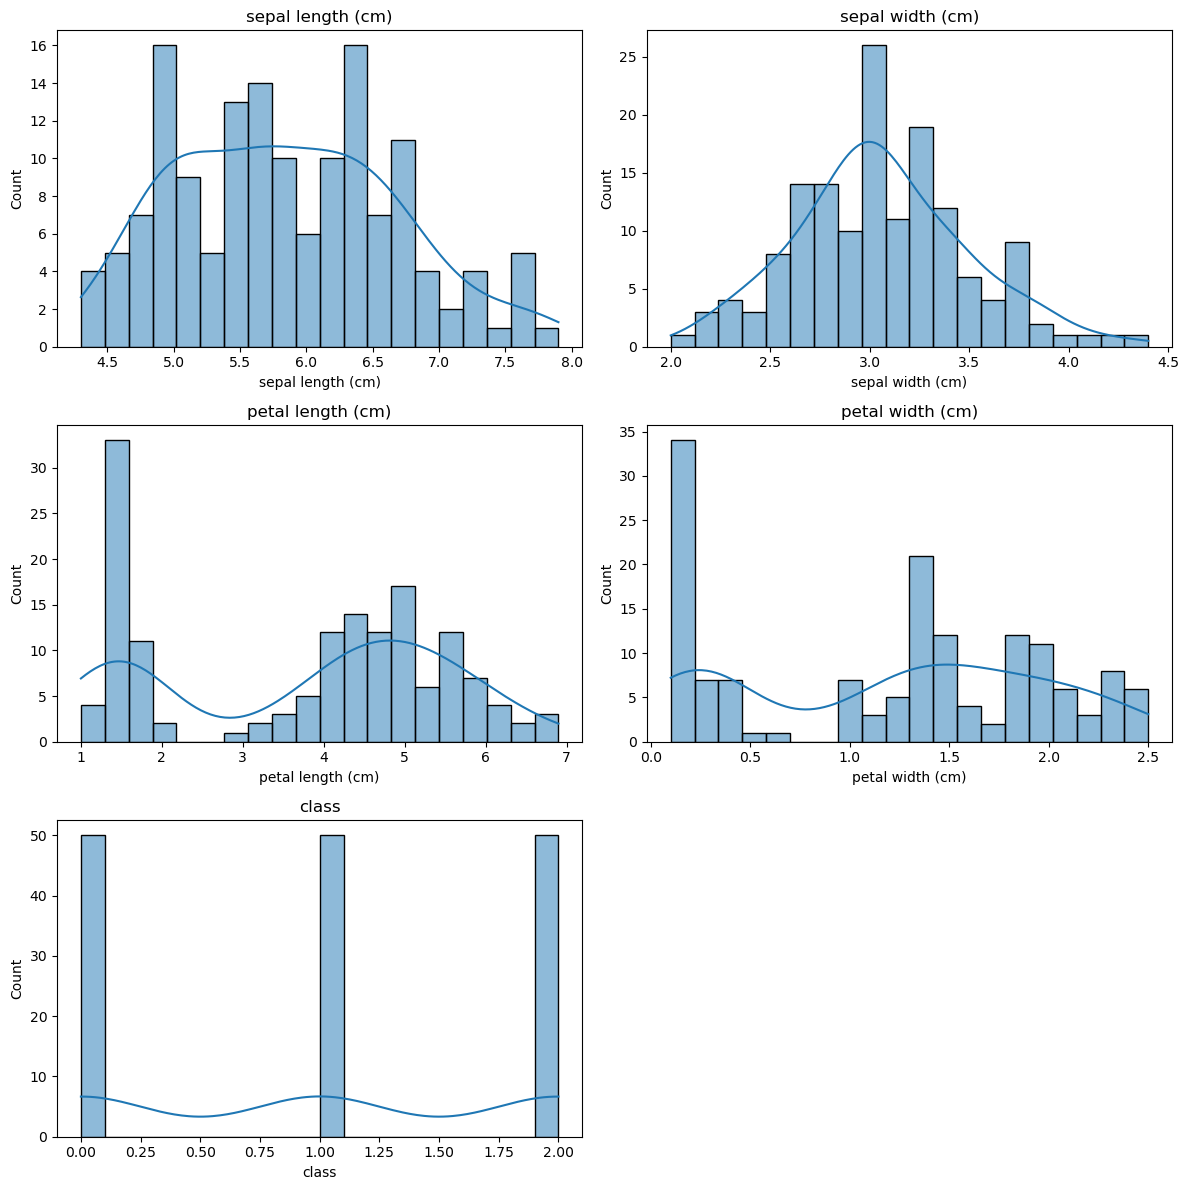

In [9]:
plt.figure(figsize = (12,12))

for index , feat in enumerate(df.columns , 1):
	plt.subplot(3, 2 , index)
	sns.histplot(df[feat] , bins = 20 , kde = True)
	plt.title(feat)
plt.tight_layout()
plt.show()

Boxplot of our dataset

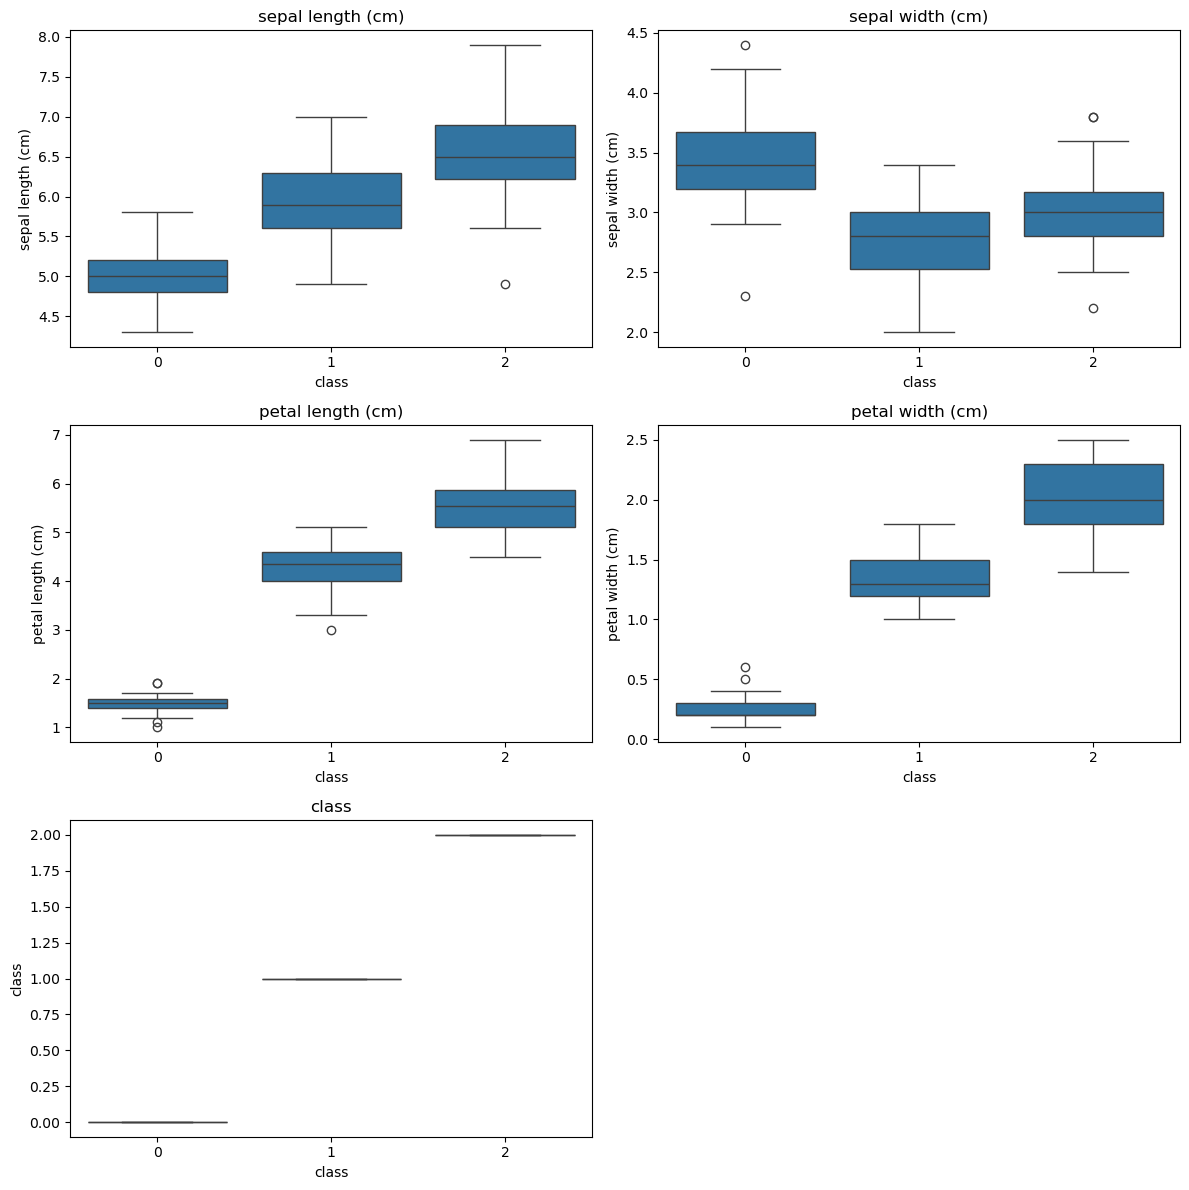

In [10]:
plt.figure(figsize = (12,12))

for index , feat in enumerate(df.columns , 1):
	plt.subplot(3, 2 , index)
	sns.boxplot(y = df[feat] , x = df['class'])
	plt.title(feat)
plt.tight_layout()
plt.show()

Correlation matrix of our features

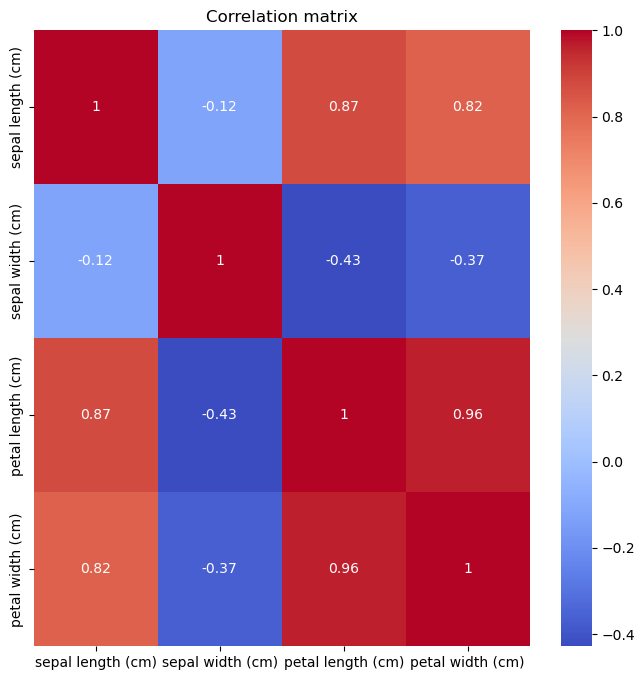

In [11]:
plt.figure(figsize = (8,8))
sns.heatmap(df.drop('class' , axis = 1).corr() , annot = True , cmap = "coolwarm")
plt.title("Correlation matrix")
plt.show()

Splitting dataset into training and testing groups

In [12]:
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.3)

In [13]:
print(f"shape of our train features  : {X_train.shape}")
print(f"shape of our test features  : {X_test.shape}")
print(f"shape of our train target  : {y_train.shape}")
print(f"shape of our test target  : {y_test.shape}")

shape of our train features  : (105, 4)
shape of our test features  : (45, 4)
shape of our train target  : (105,)
shape of our test target  : (45,)


We train some strong models

In [14]:
models = {
	'LogisticRegression' : LogisticRegression(),
	'SVM' : SVC(),
	'KNN' : KNeighborsClassifier(),
	'DecisionTree' : DecisionTreeClassifier()
}

In [15]:
results = []

Here we training and showing the model's accuracy and confusion matrix

Accuracy : LogisticRegression() is 0.9333333333333333


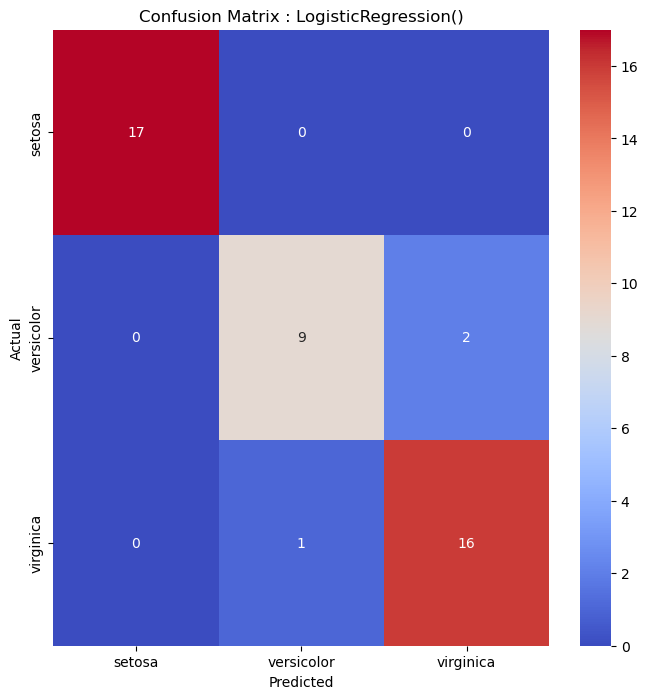

Accuracy : SVC() is 0.9333333333333333


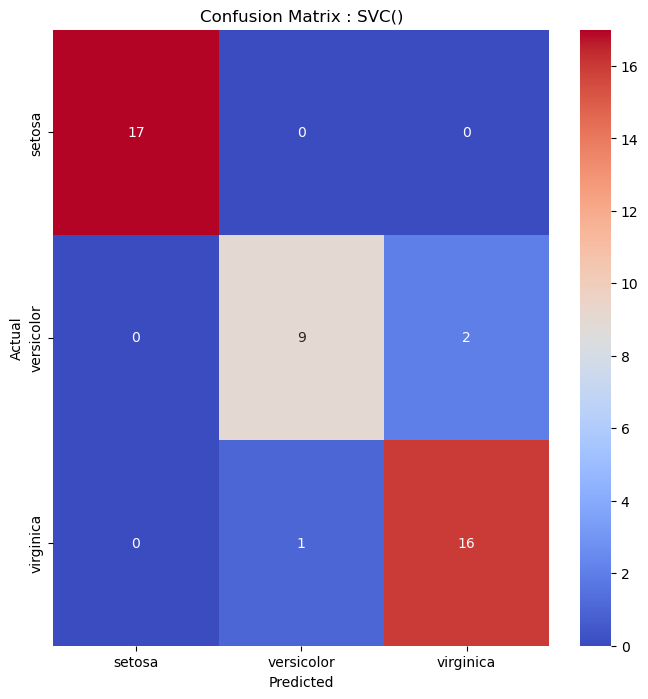

Accuracy : KNeighborsClassifier() is 0.9555555555555556


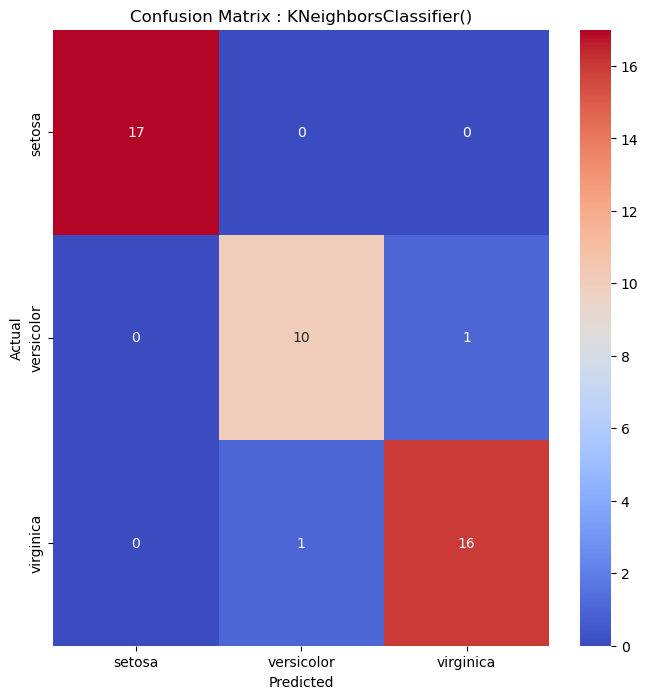

Accuracy : DecisionTreeClassifier() is 0.9333333333333333


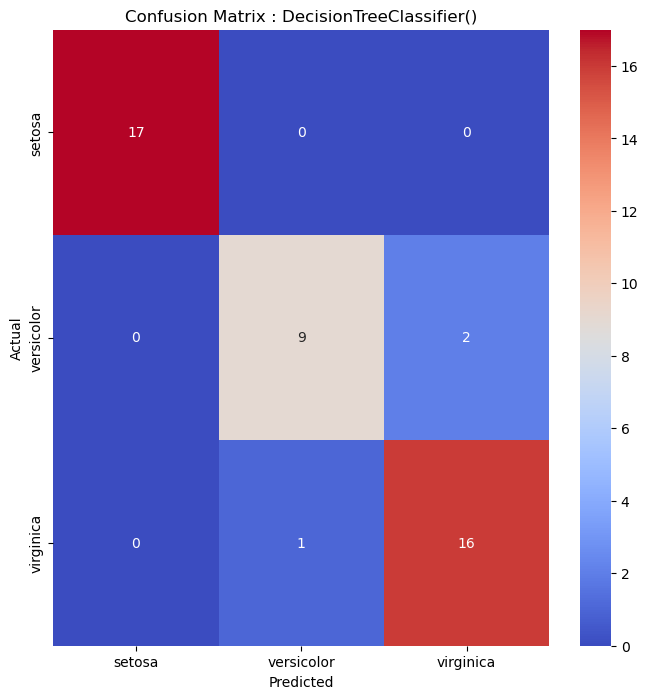

In [16]:
for model in models.values():
	model.fit(X_train , y_train)
	predict = model.predict(X_test)
	accuracy = accuracy_score(y_test , predict)
	cn = confusion_matrix(y_test , predict)
	results.append({model : accuracy})

	model_name = model.__class__.__name__
	print(f"Accuracy : {model} is {accuracy}")

	plt.figure(figsize = (8,8))
	sns.heatmap(cn , annot = True , cmap = "coolwarm" , fmt = 'd' ,yticklabels=['setosa' , 'versicolor' , 'virginica'] ,xticklabels=['setosa' , 'versicolor' , 'virginica'])
	plt.xlabel("Predicted")
	plt.ylabel("Actual")
	plt.title(f"Confusion Matrix : {model}")
	plt.show()

Printing best models by decreasing

In [17]:
final_results = {}

for res in results:
	final_results.update(res)

df_results = pd.DataFrame(list(final_results.items()) , columns=['Model' , 'Accuracy'])

df_results = df_results.sort_values(by='Accuracy' , ascending=False).reset_index(drop = True)

df_results

,Model,Accuracy
0,KNeighborsClassifier(),0.955556
1,LogisticRegression(),0.933333
2,SVC(),0.933333
3,DecisionTreeClassifier(),0.933333


Our best models is Logistic Regression

In [18]:
final_model = models['LogisticRegression']

Download the model

In [ ]:
import joblib

joblib.dump(final_model , 'final_model.joblib')

['final_model.joblib']